# Logistic Regression

## Logistic Regression Concept

- Logistic Regression bukan model regresi, namun klasifikasi
- Memprediksi probabilitas dengan fitting data ke nilai logit dengan fungsi sigmoid, range dari 0 sampai 1
- Fungsi softmax:

    $Softmax(x_i) = \frac{exp(x_i)}{\sum_j{exp(x_j)}}$


- Perlu menentukan threshold agar dihasilkan sebuah kelas

In [1]:
import numpy as np

In [2]:
def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

In [3]:
# sigmoid = softmax with two scores
logit_score = [-2, -1]
softmax(logit_score)

array([0.26894142, 0.73105858])

In [4]:
# sigmoid
logit_score = [-2, -1, 0]
softmax(logit_score)

array([0.09003057, 0.24472847, 0.66524096])

## Scikit learn

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Load Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Banking Dataset

## Load Data

In [6]:
banking = pd.read_csv("datasets/banking.csv")
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Data Exploration

Cek missing value:

In [7]:
banking.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [8]:
banking.shape

(41188, 21)

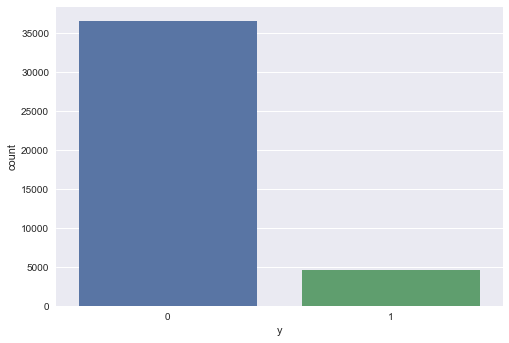

In [9]:
sns.countplot(x='y', data=banking)
plt.show()

In [10]:
banking['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [11]:
banking['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [12]:
banking.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


## Data Preparation

Convert categorical to dummy variables:

In [13]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [14]:
cat_dummy = pd.get_dummies(banking[cat_vars])
banking_dummy = banking.join(cat_dummy)
len(banking_dummy.columns)

74

Drop categorical column

In [15]:
banking_dummy.drop(cat_vars, axis=1, inplace=True)

In [16]:
len(banking_dummy.columns)

64

Feature and label splitting

In [17]:
X = banking_dummy.drop(['y'], axis=1)
y = banking_dummy['y']

Train-test splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Train Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression(max_iter=np.inf)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=inf)

## Test Model

In [22]:
# Accuracy
logreg.score(X_test, y_test)

0.9120336651290767